# Principal Component Analysis

In [1]:
import numpy as np
import math
from sklearn.decomposition import PCA 
#this library features various classification, regression, and clusturing algorithm
#including vector mechanis, random forests, gradient boosting, k-means, and DBSCAN.
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Sample data from a distribution, say multi-variate Gaussian distribution for example

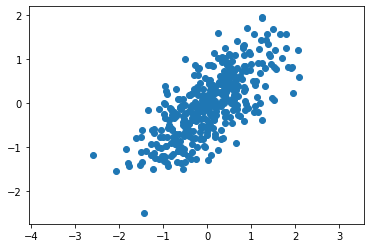

In [3]:
rng=np.random.RandomState(0) #random number derived from variety of probability distributions
X=rng.randn(2,400)
scale=np.array([[1,0],[0,0.4]]) #Standard deviation are 1 and 0.4
rotate=np.array([[1,-1],[1,1]])/math.sqrt(2)
transform=np.dot(rotate,scale) #'dot' returns the dot product of two vectors.
X=np.dot(transform, X)
#X=np.dot(scale,X)
#X=np.dot(rotate,X)
X=X.T #Transpose of X
plt.axis('equal')
plt.scatter(X[:,0],X[:,1])

In [4]:
#Now apply PCA to this data to obtaion the principal axes and their variances

In [5]:
from sklearn.decomposition import PCA
def arrow(v1,v2,ax):
    arrowprops=dict(arrowstyle='->',linewidth=2,shrinkA=0,shrinkB=0)
    ax.annotate("",v2,v1,arrowprops=arrowprops)
pca=PCA(2)
pca.fit(X)
print("Principal axes:",pca.components_)
print("Explained variance:",pca.explained_variance_)
print("Mean:",pca.mean_)

Principal axes: [[-0.73072907 -0.68266758]
 [-0.68266758  0.73072907]]
Explained variance: [0.97980663 0.16031015]
Mean: [ 0.01333067 -0.05370929]


In [6]:
#Now draw the vectors whose direction reflect those of the principal axes and whose lengths are the corresponding vaiances.
#Then we plot the data in this new coordinate system.

Text(0.5, 1.0, 'Transformed')

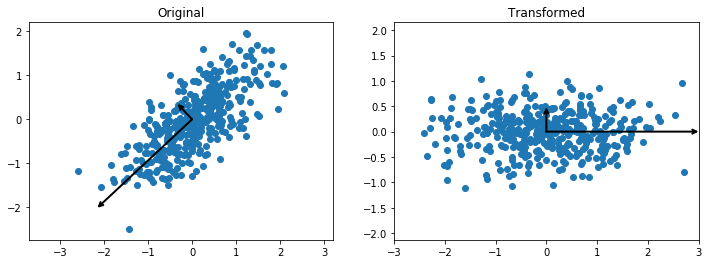

In [7]:
Z=pca.transform(X)
fig, axes = plt.subplots(1,2,figsize=(12,4))
axes[0].axis('equal')
axes[0].scatter(X[:,0],X[:,1])
axes[1].axis('equal')
axes[1].set_xlim(-3,3)
axes[1].scatter(Z[:,0],Z[:,1])
for l,v in zip(pca.explained_variance_, pca.components_):
    arrow([0,0],v*l*3,axes[0])
for l,v in zip([1.0,0.16],[np.array([1.0,0.0]),np.array([0.0,1.0])]):
    arrow([0,0],v*l*3,axes[1])
axes[0].set_title("Original")
axes[1].set_title("Transformed")

In [8]:
#PCA as dimensionility reduction tool - components with low variance are assumed to contain no important information.
#We project the above data to one dimension.

[[-0.73072907 -0.68266758]]


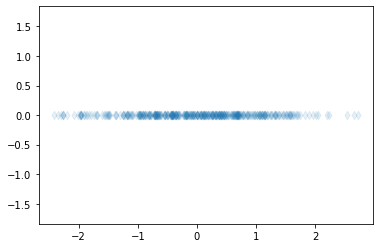

In [9]:
pca=PCA(n_components=1)
pca.fit(X)
Z=pca.transform(X)
print(pca.components_)
plt.axis('equal')
plt.scatter(Z[:,0],np.zeros(400),marker='d',alpha=0.1)

# PCA Step by Step, without using In-built PCA()

Steps:
1. Standardize the data.
2. Use the standardized data to generate a covariance matrix (or perform Singular Vector Decomposition).
3. Obtain eigenvectors (principal components) and eigenvalues from the covariance matrix. Each eigenvector will have a corresponding eigenvalue.
4. Sort the eigenvalues in descending order.
5. Select the k eigenvectors with the largest eigenvalues, where k is the number of dimensions used in the new feature space (k≤d).
6. Construct a new matrix with the selected k eigenvectors.

# Example 2

In [10]:
#Ref: https://sebastianraschka.com/Articles/2014_pca_step_by_step.html

In [11]:
import numpy as np

np.random.seed(1) # random seed for consistency

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class2_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

In [12]:
#cov_mat1
#class1_sample

Populating the interactive namespace from numpy and matplotlib


C:\Users\JDevkota\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['arrow', 'axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


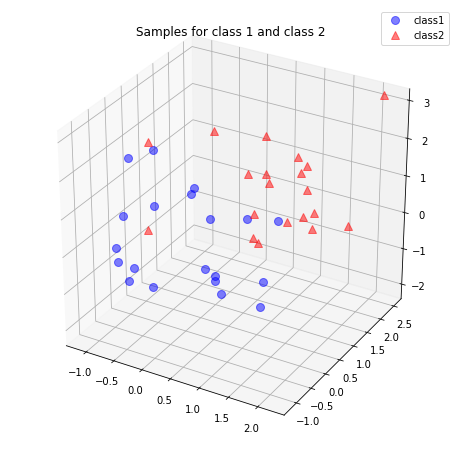

In [13]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

In [14]:
#1. Taking the whole dataset ignoring the class labels (PCA does not need the data classes!)

In [15]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix has not the dimensions 3x40"

In [16]:
#all_samples

In [17]:
#2. Computing the d-dimensional mean vector
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[0.41667492]
 [0.69848315]
 [0.49242335]]


In [18]:
#3. Computing the Covariance Matrix (alternatively to the scatter matrix)
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

#3. (alternative!) Computing the Scatter Matrix
#scatter_matrix = np.zeros((3,3))
#for i in range(all_samples.shape[1]):
#    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
#print('Scatter Matrix:\n', scatter_matrix)

Covariance Matrix:
 [[0.9868668  0.26943262 0.2855759 ]
 [0.26943262 0.92914135 0.30682016]
 [0.2855759  0.30682016 1.27528118]]


In [19]:
#4. Computing eigenvectors and corresponding eigenvalues

# eigenvectors and eigenvalues from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

# Alternative! eigenvectors and eigenvalues from the scatter matrix
#eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
#    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
#    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'
    eigvec_sc=eigvec_cov

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
#    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
#    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[-0.49210223]
 [-0.47927902]
 [-0.72672348]]
Eigenvalue 1 from covariance matrix: 1.6710094305328695
----------------------------------------
Eigenvector 2: 
[[-0.64670286]
 [-0.35756937]
 [ 0.67373552]]
Eigenvalue 2 from covariance matrix: 0.8383259734158451
----------------------------------------
Eigenvector 3: 
[[ 0.58276136]
 [-0.8015209 ]
 [ 0.13399043]]
Eigenvalue 3 from covariance matrix: 0.6819539303101816
----------------------------------------


In [20]:
#Checking the eigenvector-eigenvalue calculation
#Eigenvector eigenvalue eq: Mv=λv, M is covariance matrix

for i in range(len(eig_val_cov)):
    eigv = eig_vec_cov[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(cov_mat.dot(eigv), eig_val_cov[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

Populating the interactive namespace from numpy and matplotlib


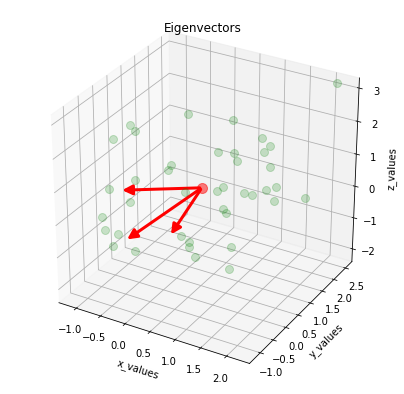

In [22]:
#Visualizing the eigenvectors: Plot the eigenvectors centered at the mean - just to check!!
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_cov.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [26]:
#5.1. Sorting the eigenvectors by decreasing eigenvalues
for ev in eig_vec_cov:
    numpy.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
    # instead of 'assert' because of rounding errors

In [27]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

1.6710094305328695
0.8383259734158451
0.6819539303101816


In [28]:
#5.2. Choosing k eigenvectors with the largest eigenvalues
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.49210223 -0.64670286]
 [-0.47927902 -0.35756937]
 [-0.72672348  0.67373552]]


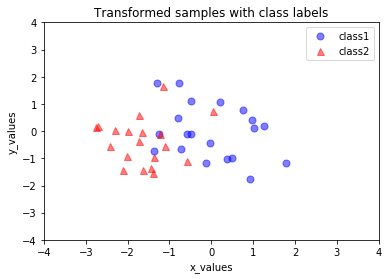

In [29]:
#6. Transforming the samples onto the new subspace
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

# Using the PCA() class from the sklearn.decomposition library to confirm our results

n order to make sure that we have not made a mistake in our step by step approach, we will use another library that doesn’t rescale the input data by default.
Here, we will use the PCA class from the scikit-learn machine-learning library. The documentation can be found here:
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html.

For our convenience, we can directly specify to how many components we want to reduce our input dataset via the n_components parameter.

n_components : int, None or string

    Number of components to keep. if n_components is not set all components are kept:
        n_components == min(n_samples, n_features)
        if n_components == ‘mle’, Minka’s MLE is used to guess the dimension if 0 < n_components < 1,
        select the number of components such that the amount of variance that needs to be explained
        is greater than the percentage specified by n_components

Next, we just need to use the .fit_transform() in order to perform the dimensionality reduction.

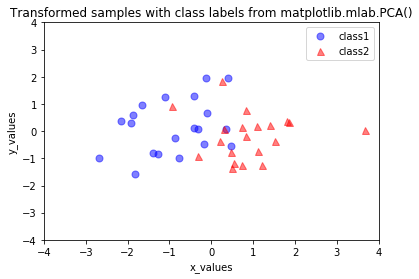

In [30]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(all_samples.T)

plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

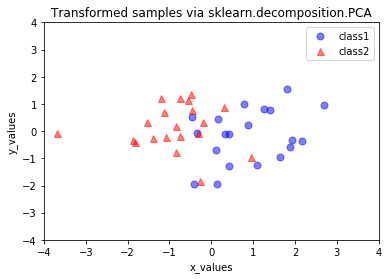

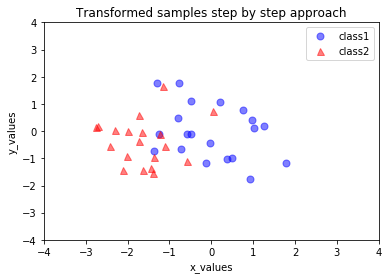

In [31]:
sklearn_transf = sklearn_transf * (-1)

# sklearn.decomposition.PCA
plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples via sklearn.decomposition.PCA')
plt.show()

# step by step PCA
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples step by step approach')
plt.show()

Looking at the 2 plots above, the distributions along the component axes look identical, only the center of the data is slightly different. If we want to mimic the results produced by scikit-learn’s PCA class, we can subtract the mean vectors from the samples X to center the data at the coordinate system’s origin (thanks to a suggestion by Alexander Guth) – that is, replacing the transformation transformed = matrix_w.T.dot(all_samples) by transformed = matrix_w.T.dot(all_samples - mean_vector).